In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os

from os import path
from tensorflow.keras.utils import image_dataset_from_directory, plot_model
from matplotlib import pyplot as plt
from tensorflow.keras import layers, losses, optimizers, metrics, callbacks, Model, Input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [2]:
N_CLASS = 10

In [3]:
def create_model():
    input_layer = Input(shape=(2048))
    x = layers.Dense(2048, activation="relu")(input_layer)
    x = layers.BatchNormalization()(x)
    output = layers.Dense(N_CLASS, activation="softmax")(x)
    model = Model(inputs=input_layer, outputs=output)
    return model

model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2048)]            0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 4,225,034
Trainable params: 4,220,938
Non-trainable params: 4,096
_________________________________________________________________


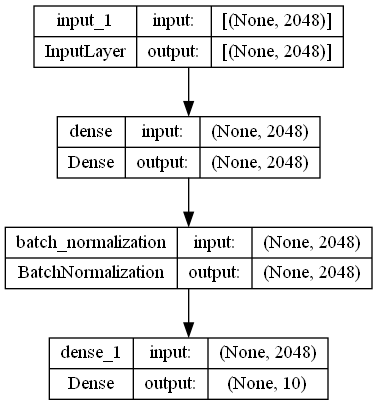

In [6]:
plot_model(model=model, to_file="resnet_begin.png", show_shapes=True)

In [7]:
def get_model():
    input_layer = Input(shape=(2048))
    x = layers.Dropout(0.3)(input_layer)
    x = layers.Dense(2048, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    output = layers.Dense(N_CLASS, activation="softmax")(x)
    model = Model(input_layer, output)
    return model

model = get_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2048)]            0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 2048)              4196352   
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                20490     
                                                           

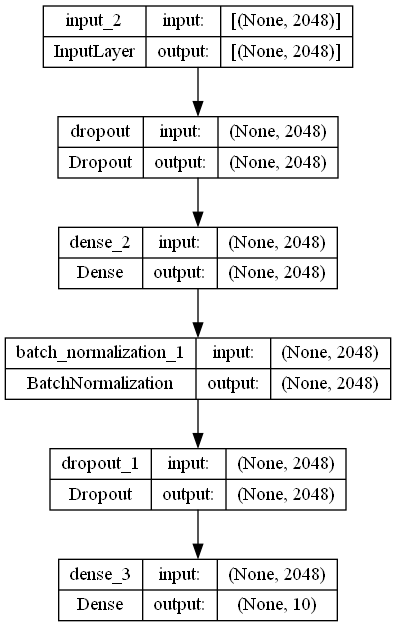

In [9]:
plot_model(model=model, to_file="resnet_final.png", show_shapes=True)

In [10]:
def create_model():
    input_layer = Input(shape=(7, 7, 512))
    x = layers.Flatten()(input_layer)
    x = layers.Dense(1024, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(1024, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    output = layers.Dense(N_CLASS, activation="softmax")(x)
    model = Model(inputs=input_layer, outputs=output)
    return model

model = create_model()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7, 7, 512)]       0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              25691136  
                                                                 
 batch_normalization_2 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 batch_normalization_3 (Batc  (None, 1024)             4096      
 hNormalization)                                           

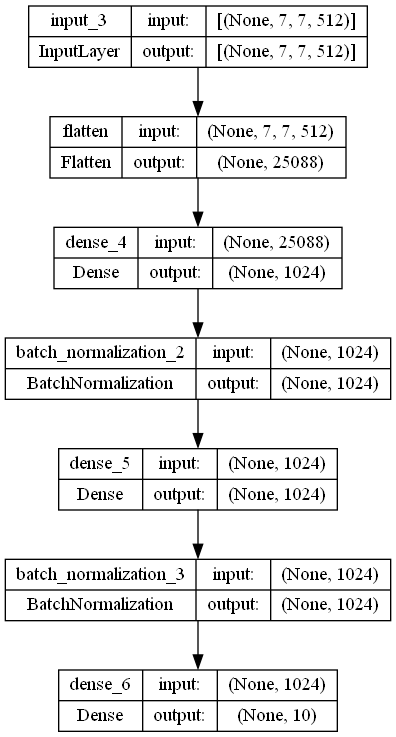

In [11]:
plot_model(model=model, to_file="vgg_model.png", show_shapes=True)